# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(x_train.shape)
print(y_train.shape)
print(class_names)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
(50000, 32, 32, 3)
(50000, 1)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


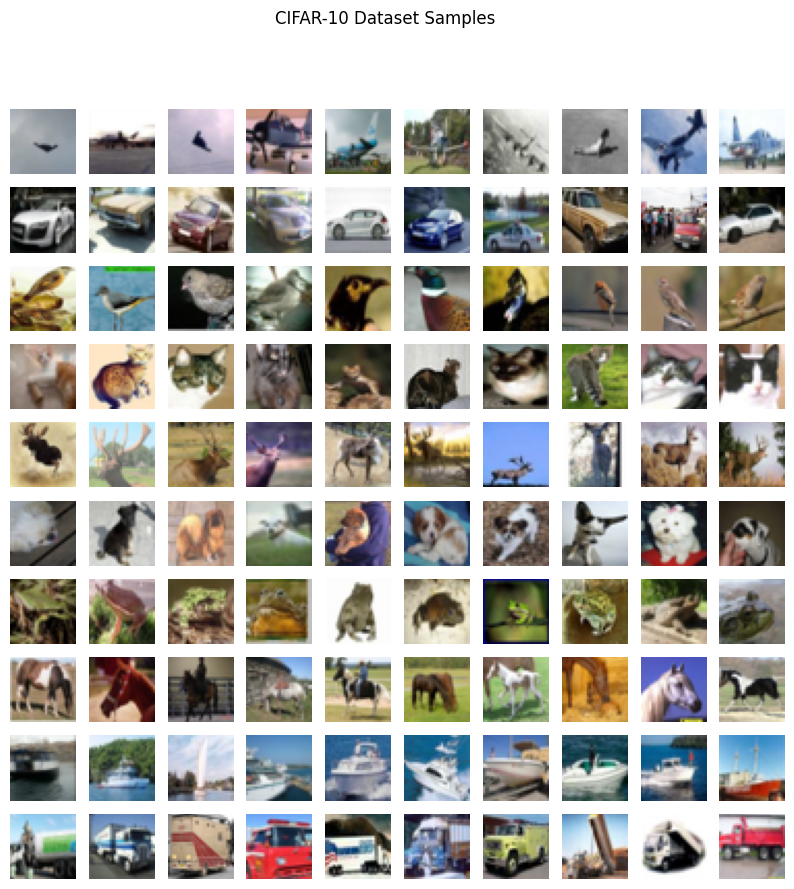

In [2]:
# Visualizing 10 random images from each class
plt.figure(figsize=(10, 10))
num_classes = len(class_names)
samples_per_class = 10

for i in range(num_classes):
    # Get indices of images belonging to the current class
    indices = np.where(y_train.flatten() == i)[0]
    random_indices = np.random.choice(indices, samples_per_class, replace=False)

    for j in range(samples_per_class):
        plt.subplot(num_classes, samples_per_class, i * samples_per_class + j + 1)
        plt.imshow(x_train[random_indices[j]])
        plt.axis('off')
        if j == 0:
            plt.ylabel(class_names[i], fontsize=10)

plt.suptitle("CIFAR-10 Dataset Samples", fontsize=12)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Normalize image data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Print shapes of the processed data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train_one_hot.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test_one_hot.shape)

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.backend import clear_session

clear_session()

In [5]:
# Your code here :
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [6]:
# Your code here :
# Normalize images to the range [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.1521 - loss: 2.2666 - val_accuracy: 0.2238 - val_loss: 2.1708
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2415 - loss: 2.1351 - val_accuracy: 0.2841 - val_loss: 2.0546
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2933 - loss: 2.0264 - val_accuracy: 0.3072 - val_loss: 1.9757
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3199 - loss: 1.9535 - val_accuracy: 0.3254 - val_loss: 1.9187
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3330 - loss: 1.9104 - val_accuracy: 0.3417 - val_loss: 1.8934
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3461 - loss: 1.8813 - val_accuracy: 0.3280 - val_loss: 1.8799
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3613 - loss: 1.8468 - val_accuracy: 0.3578 - val_loss: 1.8332
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3647 - loss: 1.8263 - val_accuracy: 0.3647 - val_los

*   Plot the cross entropy loss curve and the accuracy curve

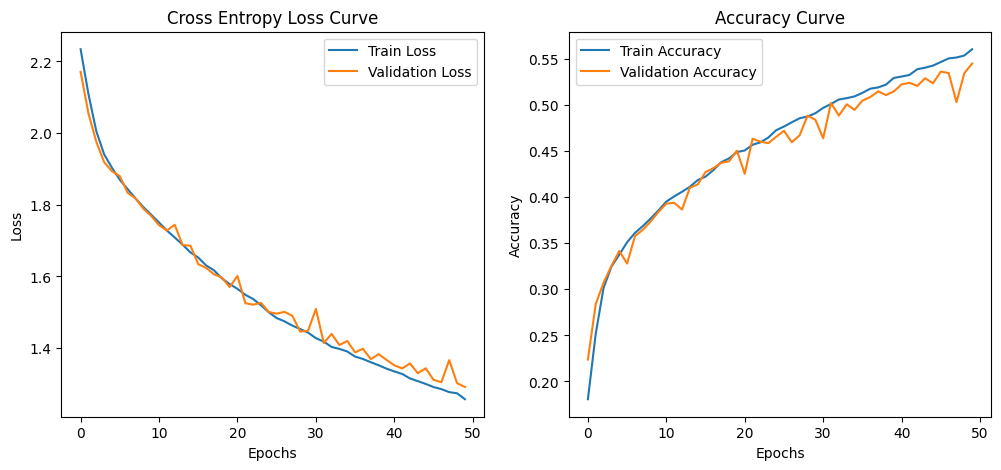

In [7]:
# Your code here :
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
clear_session()

In [9]:
# Your code here :
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize image data to range [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
# Your code here :
# Define VGG-style CNN model
vgg_model = Sequential([
    # First Conv Block: Two Conv layers + MaxPooling
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten feature maps
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),

    # Output layer
    Dense(10, activation='softmax')
])

# Compile the model
vgg_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
vgg_history = vgg_model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.1753 - loss: 2.2656 - val_accuracy: 0.2639 - val_loss: 2.1093
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2736 - loss: 2.0618 - val_accuracy: 0.2822 - val_loss: 2.0110
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3064 - loss: 1.9636 - val_accuracy: 0.3343 - val_loss: 1.8899
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3441 - loss: 1.8717 - val_accuracy: 0.3461 - val_loss: 1.8606
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3615 - loss: 1.8189 - val_accuracy: 0.3606 - val_loss: 1.8046
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3747 - loss: 1.7754 - val_accuracy: 0.3973 - val_loss: 1.7390
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3810 - loss: 1.7549 - val_accuracy: 0.3990 - val_loss: 1.7043
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4013 - loss: 1.7084 - val_accuracy: 0.3745 - 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


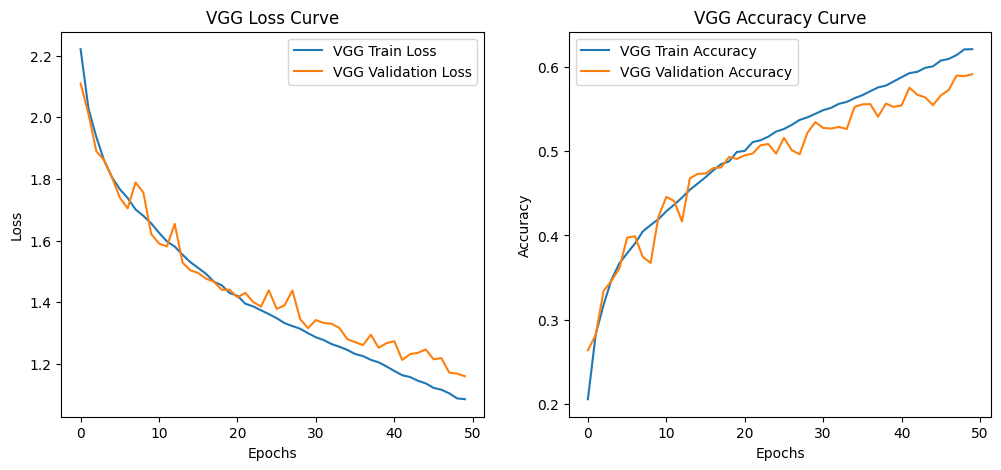

In [11]:
# Your code here :

# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))

#loss curve
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['loss'], label='VGG Train Loss')
plt.plot(vgg_history.history['val_loss'], label='VGG Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG Loss Curve')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['accuracy'], label='VGG Train Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='VGG Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('VGG Accuracy Curve')
plt.legend()

plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


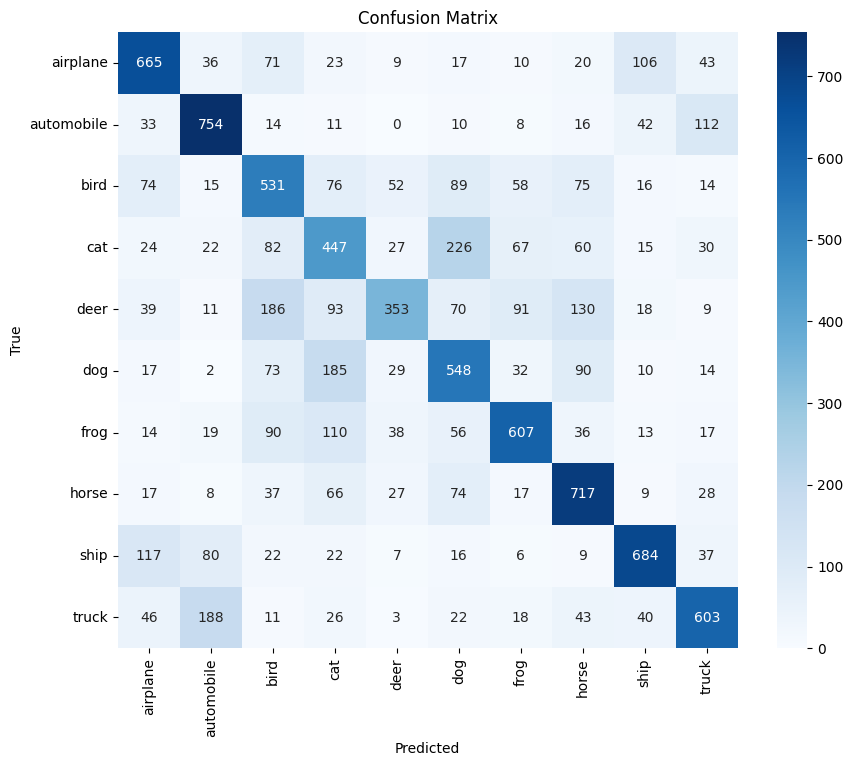

In [12]:
# Your code here :
# Predict the test set
y_pred = np.argmax(vgg_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [13]:
# Your code here :
# Evaluate test accuracy
test_loss, test_acc = vgg_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.5909


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Clear previous models from memory
from keras.backend import clear_session
clear_session()

In [15]:
# Your code here :
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Resize images from (32x32) to (64x64)
x_train = tf.image.resize(x_train, (64, 64)).numpy()
x_test = tf.image.resize(x_test, (64, 64)).numpy()

# Normalize image
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 89s 601ms/step - accuracy: 0.1165 - loss: 2.3009 - val_accuracy: 0.1345 - val_loss: 2.2941
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.1426 - loss: 2.2897 - val_accuracy: 0.1777 - val_loss: 2.2653
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.1854 - loss: 2.2387 - val_accuracy: 0.2520 - val_loss: 2.0945
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.2459 - loss: 2.0979 - val_accuracy: 0.2896 - val_loss: 2.0168
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.2896 - loss: 2.0031 - val_accuracy: 0.3195 - val_loss: 1.8974
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.3221 - loss: 1.9229 - val_accuracy: 0.3403 - val_loss: 1.8873
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.3415 - loss: 1.8664 - val_accuracy: 0.3735 - val_loss: 1.7534
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.3652 - loss: 1.7939 - val_accu

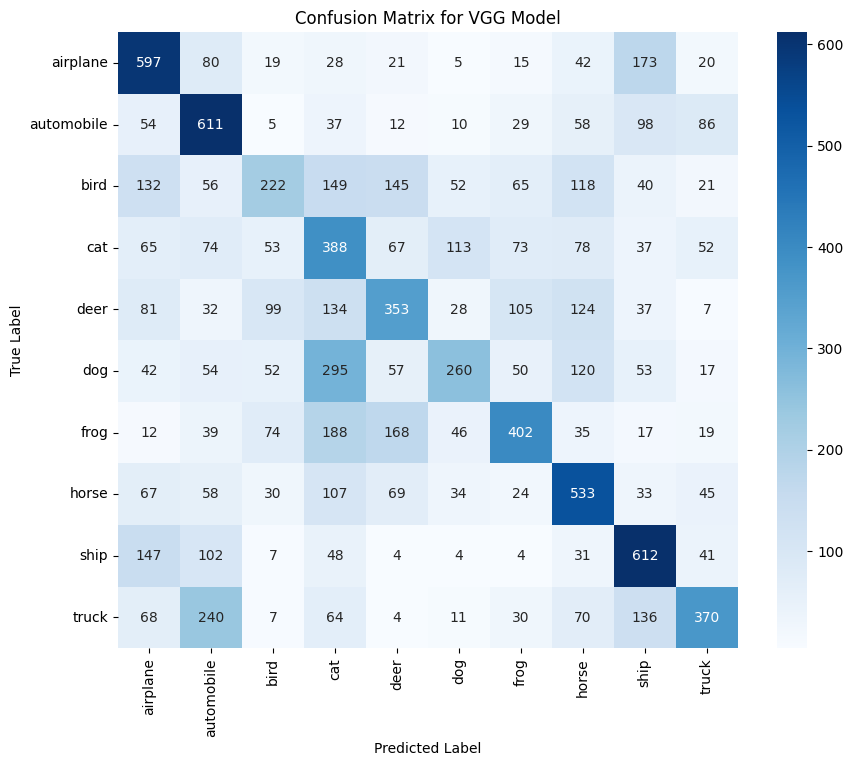

Test Accuracy: 0.4348


In [16]:
# Your code here :
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Resize images from (32x32) to (64x64)
x_train = tf.image.resize(x_train, (64, 64)).numpy()
x_test = tf.image.resize(x_test, (64, 64)).numpy()

# Normalize images to range [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# Define a deeper VGG-style CNN model
vgg_model = Sequential([
    # First Conv Block: Two Conv layers (64 filters) + MaxPooling
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Conv Block: Two Conv layers (128 filters) + MaxPooling
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Conv Block: Two Conv layers (256 filters) + MaxPooling
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten feature maps
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),

    # Output layer
    Dense(10, activation='softmax')
])

# Compile the model
vgg_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model for 10 epochs
vgg_history = vgg_model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))
# Predict the test set
y_pred = np.argmax(vgg_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for VGG Model")
plt.show()
# Evaluate test accuracy
test_loss, test_acc = vgg_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
